# New Kaggle Diamonds Dataset (Large): Regression & Classification? 

## __About__

### ___Notebook Author___: Marcus Collins
### ___Date___: 2024-mmm

## __Credits__

### ___Dataset___: [Large Diamonds Dataset Kaggle](https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle)
### ___Dataset Owner___: hrokrin

## __Introduction__

### Abstract
This notebook is a demonstration of basic skills using R for preliminary data exploration, transformation & cleaning and modelling. \
The ability to perform linear regression and possibly to classification will be demonstrated. Then model testing will be performed for each model generated. \
The dataset has over 200k observations and therefore __R__'s ___data.table___ will be used for speed and memory efficiency.

### Dataset Information
The following is a brief description of the columns present in the dataset (provided on the Kaggle dataset URL provided above. \

#### Columns
- __cut__: refers to one of the 10 or so most common diamond cuts.
    * ___Note___: This dataset has an additional label called '___Cushion Modified___'.
- __color__: clear diamonds are graded D to Z.
    * ___Note___: The higher letter mean more yellowish tint, but are often have better values since color is difficult to determine once in a ring.
- __clarity__: refers to inclusions (i.e. internal flaws) in the diamonds seen through a jeweler's loupe or microscope. Fewer & smaller are better.
- __carat_weight__: refers to the mass of the diamond. 1 carat == 0.200 grams
- __cut_quality__: refers to the GIA Cut Grading System.
    * ___Notes___:
        + [Gemological Institute of America (GIA)](https://www.gia.edu) has more info on how analysis and grading are done. The [GIA 4Cs Cut](https://www.gia.edu/gia-about/4cs-cut) page has examples of cut grading done by GIA.
- __lab__: the lab that performed the grading. The big three are: __GIA__, __IGI__ and __HRD__.
    * ___Notes___:
        + [International Gemological Institute](https://www.igi.org) homepage
        + [Hoge Raad voor Diamant](https://hrdantwerp.com) homepage (European authority on diamond quality)
- __polish__: the polish of the diamond. Grade/Level given based on jeweler's perceived craftsmanship.
- __symmetry__: the level of symmetry of the diamond's cut. Grade/Level given based on jeweler's perceived craftsmanship.
- __eye_clean__: refers to blemishes or inclusions that can be seen with a naked eye. There are 10 grades/levels.
- __culet_size__: the size of the circlet one would see if looking at the diamond straight down. None is ideal. This affects the amount of light that gets reflected by the diamond.
- __culet_condition__: indicates if the culet has any chipping. This can affect whether a diamond closes to a point or a very small flat spot.
- __fluor_STR__: columns that refer to the effect of long wave ultraviolet (UV) light. {__STR__: color, intensity}
    * ___Note___: According to GIA 25-35% have fluor.
- __depth_percent__:
- __table_percent__: this and preceding columns are relative measurements of the depth and flat part of the top.
- __meas_length__:
- __meas_width__:
- __meas_depth__: this and the preceding two columns are the absolute measurements of the stone. For round diamonds, only ___length___ and ___depth___ are measured.
- __girdle_min__:
- __girdle_max__: minimum and maximum are where the identification of a stone is engraved. There are 9 values ranging from "Extremely Thin" to "Extremely Thick".
- __fancy_color_STR__: columns refer to colored diamonds only. These refer to the colors, secondary colors and their intensity. {__STR__: dominant_color, secondary_color, overtone, intensity}
- __total_sales_price__: price in U.S. dollars (USD).

## __Code__

### Package Imports

In [33]:
library(data.table)
library(dtplyr)
library(ggplot2)
library(patchwork)
library(repr)

### Filepaths and Filenames

In [2]:
datapath = file.path(getwd(), "../data")
imagepath = file.path(getwd(), "images")

In [3]:
datafile = file.path(datapath, "DiamondsLargest-Kaggle.csv")

### Data Preview

In [4]:
diamonds_dt <- data.table::fread(datafile)

In [5]:
### Show dimensions of data.table (rows x columns)
dim(diamonds_dt)

[1] 219703     26

In [6]:
head(diamonds_dt, n=10);
tail(diamonds_dt, n=10)

V1,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,⋯,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,⋯,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,⋯,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,⋯,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,⋯,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,⋯,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
5,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,⋯,1.81,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,⋯,1.84,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
7,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,⋯,1.78,M,M,unknown,None,unknown,unknown,unknown,unknown,200
8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,⋯,1.85,STK,TK,unknown,None,unknown,unknown,unknown,unknown,200


V1,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,⋯,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
219694,Round,E,IF,12.52,Excellent,GIA,Excellent,Excellent,unknown,⋯,9.24,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,1121792
219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,⋯,9.24,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,1121792
219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,⋯,8.47,unknown,unknown,unknown,None,Yellow,unknown,unknown,Fancy Vivid,1124122
219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,⋯,8.69,TN,STK,unknown,Faint,unknown,unknown,unknown,unknown,1132347
219698,Oval,unknown,VS1,10.04,unknown,GIA,Excellent,Excellent,unknown,⋯,7.90,unknown,unknown,unknown,None,Yellow,unknown,unknown,Fancy Vivid,1161102
219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,⋯,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,⋯,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,⋯,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,⋯,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [7]:
summary(diamonds_dt)

       V1             cut               color             clarity         
 Min.   :     0   Length:219703      Length:219703      Length:219703     
 1st Qu.: 54926   Class :character   Class :character   Class :character  
 Median :109852   Mode  :character   Mode  :character   Mode  :character  
 Mean   :109852                                                           
 3rd Qu.:164778                                                           
 Max.   :219703                                                           
  carat_weight     cut_quality            lab              symmetry        
 Min.   : 0.0800   Length:219703      Length:219703      Length:219703     
 1st Qu.: 0.3100   Class :character   Class :character   Class :character  
 Median : 0.5000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 0.7552                                                           
 3rd Qu.: 1.0000                                                           
 Max.   :19.3500   

#### __Initial Observations__

- The ___cut___, ___lab___, ___fancy_color_dominant_color___, and ___fancy_color_secondary_color___ features can all be converted to \[unordered\] Factor types
- The ___color___, ___clarity___, ___cut_quality___, ___symmetry___, and ___polish___ features should all be converted to \[ordered\] Factor types
- It is unclear until the values present in the feature are shown whether ___eye_clean___, ___girdle_min___, ___girdle_max___, and ___fancy_color_intensity___ should be \[ordered\] or \[unordered\] Factor types
- The ___carat_weight___, ___depth_percent___, ___table_percent___, and ___meas_STR___ features seemingly have a either narrow or very narrow distributions (will verify via visualization)

In [20]:
### Show the unique values within the uncertain columns/features
for (column in c("eye_clean", "girdle_min", "girdle_max", "fancy_color_intensity")) {
    print( "" )
    print( unique(diamonds_dt[, ..column]) )
    print( as.character("") )
}

[1] ""
    eye_clean
       <char>
1:    unknown
2:        Yes
3:         E1
4: Borderline
5:         No
[1] ""
[1] ""
    girdle_min
        <char>
 1:          M
 2:        STK
 3:         TN
 4:         TK
 5:    unknown
 6:        VTN
 7:        VTK
 8:        XTK
 9:        XTN
10:        STN
[1] ""
[1] ""
    girdle_max
        <char>
 1:          M
 2:        STK
 3:         TK
 4:    unknown
 5:         TN
 6:        VTK
 7:        XTK
 8:        XTN
 9:        VTN
10:        STN
[1] ""
[1] ""
    fancy_color_intensity
                   <char>
 1:               unknown
 2:                 Fancy
 3:            Very Light
 4:                 Faint
 5:           Fancy Light
 6:                 Light
 7:            Fancy Deep
 8:         Fancy Intense
 9:            Fancy Dark
10:           Fancy Vivid
[1] ""


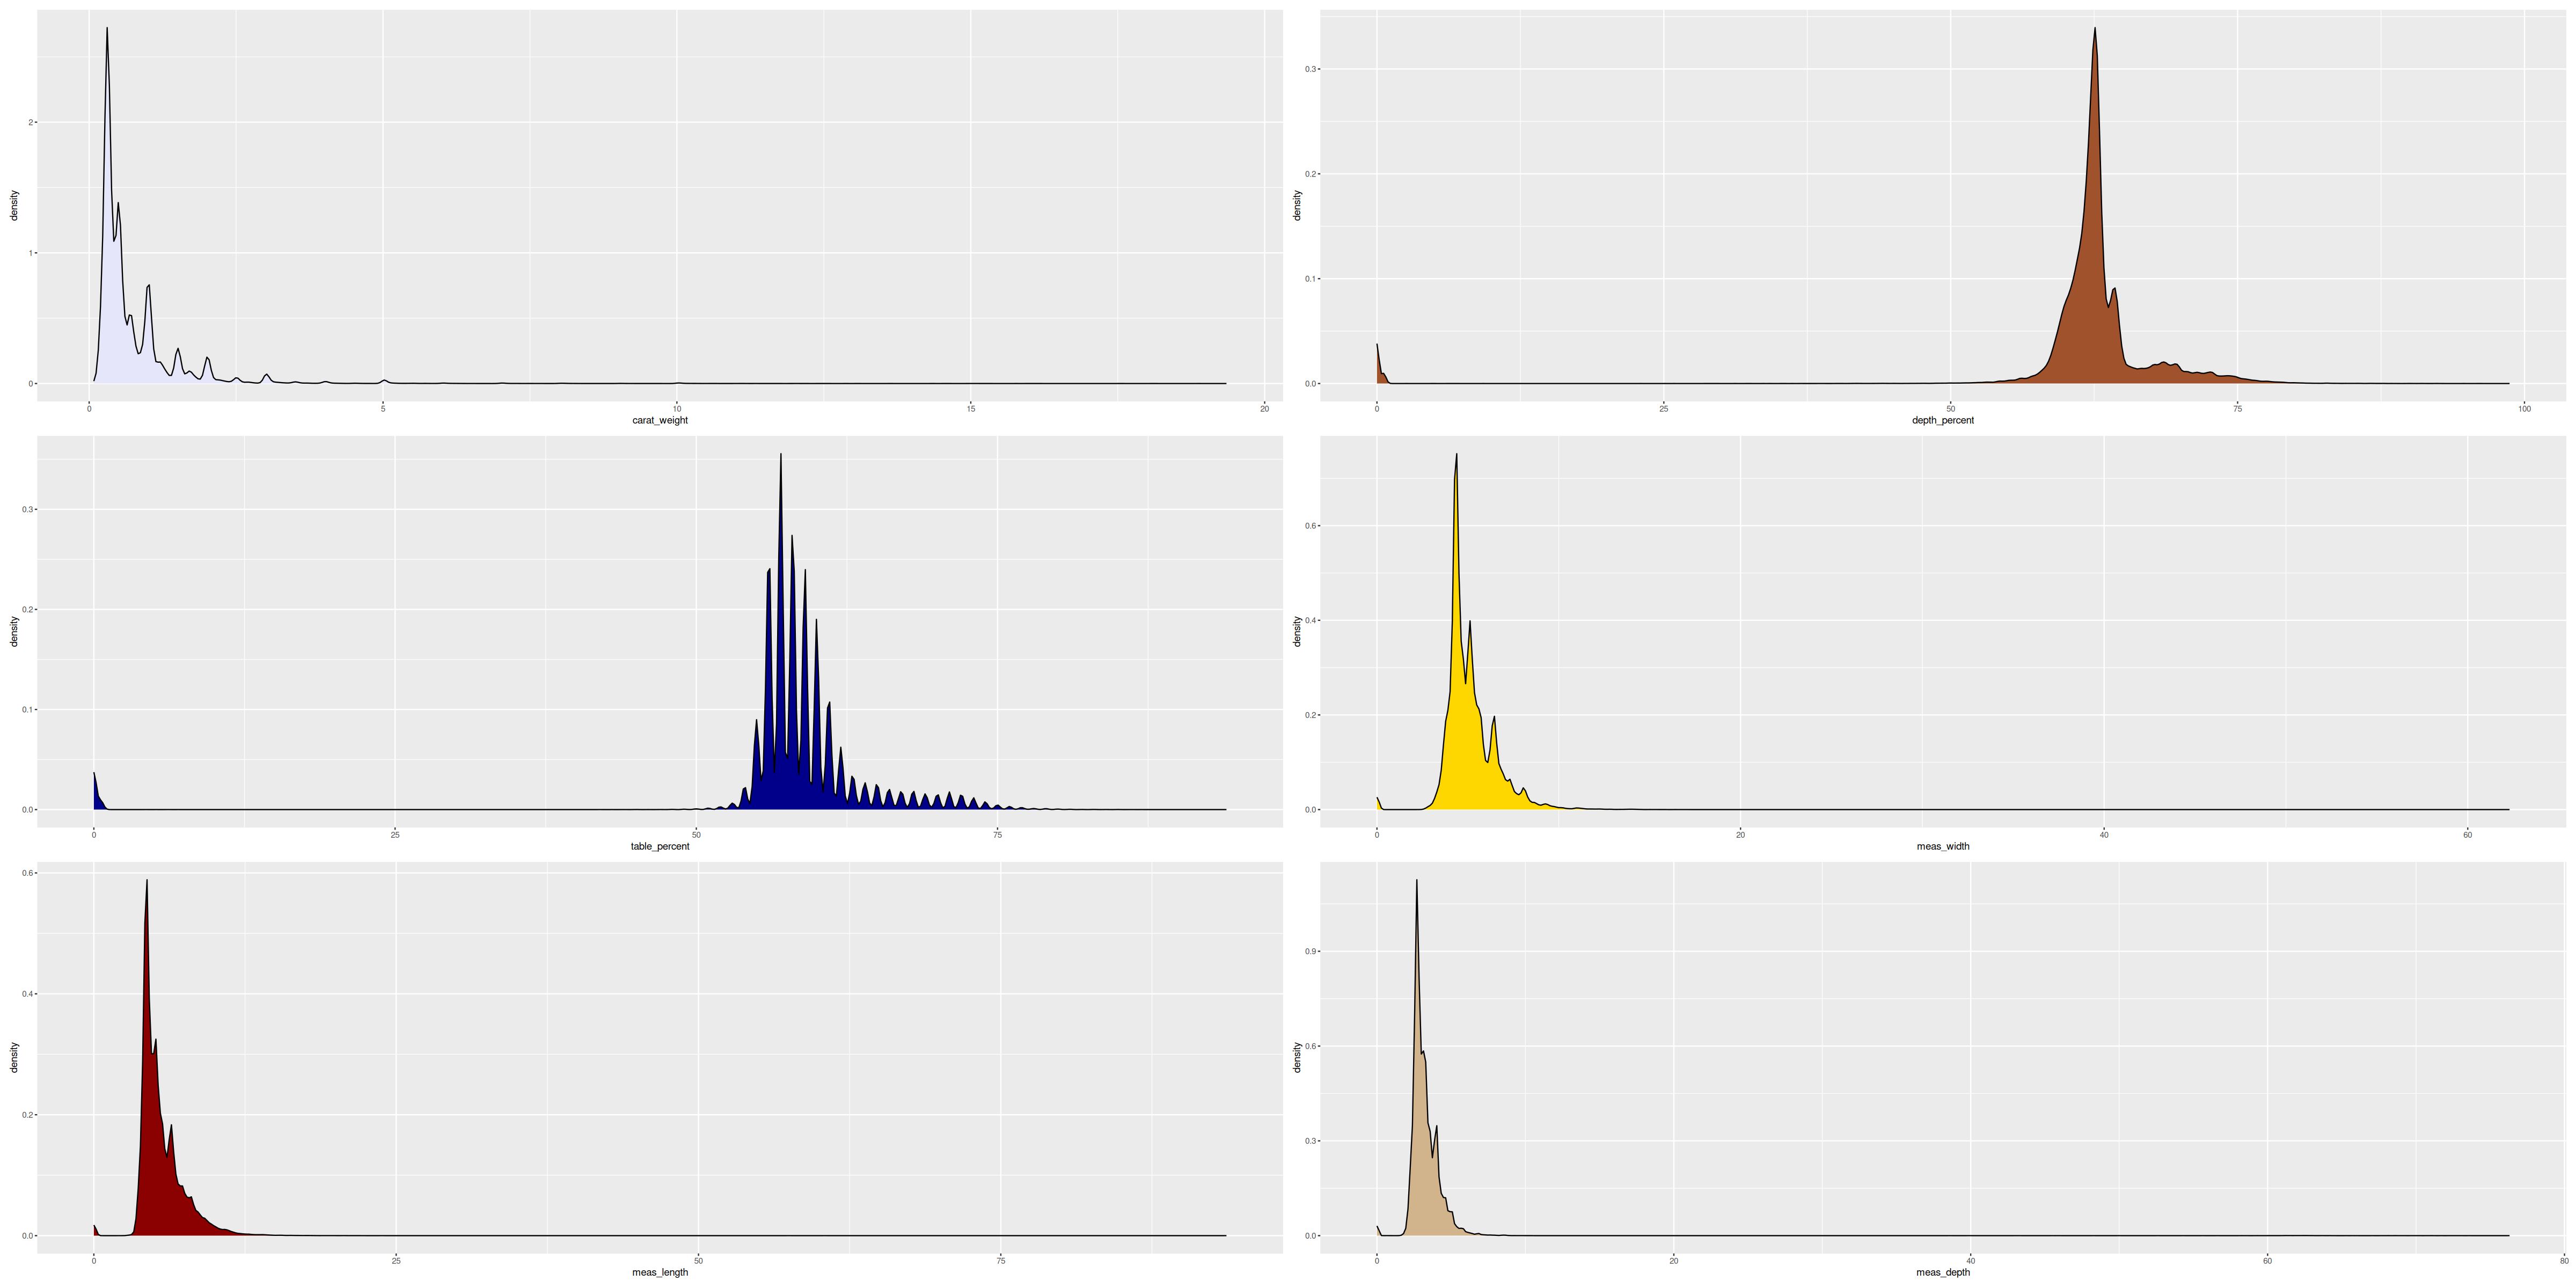

In [55]:
### Plot the distributions of the obvious numerical columns
crtw_dist <- ggplot(diamonds_dt) + geom_density(aes(x=carat_weight), kernel='gaussian', fill='lavender')
dpct_dist <- ggplot(diamonds_dt) + geom_density(aes(x=depth_percent), kernel='gaussian', fill='sienna')
tbpct_dist <- ggplot(diamonds_dt) + geom_density(aes(x=table_percent), kernel='gaussian', fill='darkblue')
mw_dist <- ggplot(diamonds_dt) + geom_density(aes(x=meas_width), kernel='gaussian', fill='gold')
ml_dist <- ggplot(diamonds_dt) + geom_density(aes(x=meas_length), kernel='gaussian', fill='darkred')
md_dist <- ggplot(diamonds_dt) + geom_density(aes(x=meas_depth), kernel='gaussian', fill='tan')


options(repr.plot.height=20, repr.plot.width=40)
crtw_dist + dpct_dist + tbpct_dist + mw_dist + ml_dist + md_dist + plot_layout(nrow=3)